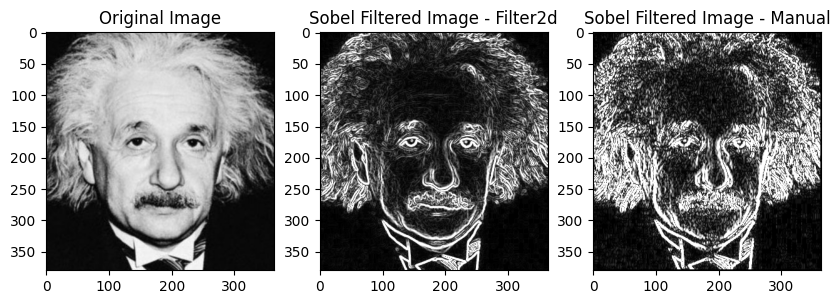

Text(0.5, 1.0, 'Sobel filtering using matrix decomposition - Filter2D')

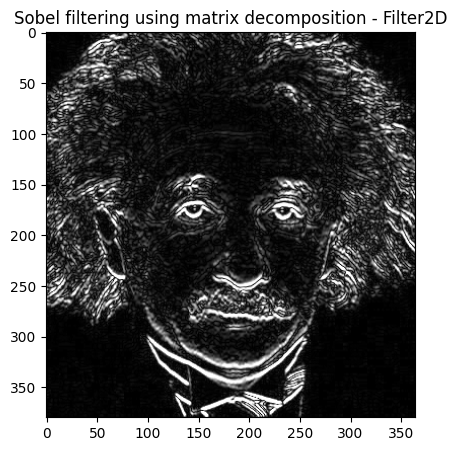

In [1]:
#Question 6 - Sobel Filters

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
assert im is not None

#Sobel Kernels
kernel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
kernel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

#Part (a)
#Using filter2d to Sobel filter the image
sob_x = cv.filter2D(im, cv.CV_64F, kernel_x)
sob_y = cv.filter2D(im, cv.CV_64F, kernel_y)
sob_init = cv.magnitude(sob_x, sob_y)
sob = cv.convertScaleAbs(sob_init)

#Part (b)
#Sobel filtering manually
def manual_sob(img, kern_x, kern_y):
    height, width = img.shape[:2]
    sob_x2 = np.zeros_like(img, dtype=np.float32)
    sob_y2 = np.zeros_like(img, dtype=np.float32)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            sob_x2[y, x] = np.sum(img[y-1:y+2, x-1:x+2] * kern_x)
            sob_y2[y, x] = np.sum(img[y-1:y+2, x-1:x+2] * kern_y)

    sob_m_init = np.sqrt(sob_x2**2 + sob_y2**2)
    sob_final = cv.convertScaleAbs(sob_m_init)
    return sob_final

sob_m = manual_sob(im, kernel_x, kernel_y)

#Part (c)
#Using the new matrix
new_kernel_x = np.array([1, 0, -1])
new_kernel_y = np.array([1, 2, 1])

sobel_x = cv.filter2D(im, cv.CV_64F, new_kernel_x)
sobel_y = cv.filter2D(sobel_x, cv.CV_64F, new_kernel_y.reshape(-1,1))
mag = cv.magnitude(sobel_x, sobel_y)
mag_uint8 = cv.convertScaleAbs(mag)


fig, ax = plt.subplots(1,3, figsize = (10,10))
ax[0].imshow(im)
ax[0].set_title('Original Image')
ax[1].imshow(sob)
ax[1].set_title('Sobel Filtered Image - Filter2d')
ax[2].imshow(sob_m)
ax[2].set_title('Sobel Filtered Image - Manual')
plt.show()

fig2, ax2 = plt.subplots(1,1, figsize = (5,5))
ax2.imshow(mag_uint8)
ax2.set_title('Sobel filtering using matrix decomposition - Filter2D')
plt.show()